<img alt='UCL' src="images/ucl_logo.png" align='center'>


[<img src="images/noun_post_2109127.svg" width="50" align='right'>](016_Python_for.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](018_Python_xxx.ipynb)



#  Viewing Images


### Purpose

We have seen from [021 Streams](021_Streams.ipynb) and [022 Read write files](022_Read_write_files.ipynb) how to access both text and binary datasets, either from the local file system or from a URL and in [023 Plotting](023_Plotting.ipynb) how to use [`matplotlib`](https://matplotlib.org) for plotting graphs. 

In this section, we will learn how to view images using [`matplotlib`](https://matplotlib.org/3.3.1/tutorials/introductory/images.html).

You might follow these notes up by looking at the Python package [`folium`](https://python-visualization.github.io/folium/) for interactive displays.

### Prerequisites

You will need some understanding of the following:


* [001 Using Notebooks](001_Notebook_use.ipynb)
* [002 Unix](002_Unix.ipynb) with a good familiarity with the UNIX commands we have been through.
* [003 Getting help](003_Help.ipynb)
* [010 Variables, comments and print()](010_Python_Introduction.ipynb)
* [011 Data types](011_Python_data_types.ipynb) 
* [012 String formatting](012_Python_strings.ipynb)
* [013_Python_string_methods](013_Python_string_methods.ipynb)
* [020_Python_files](020_Python_files.ipynb)
* [021 Streams](021_Streams.ipynb)
* [022 Read write files](022_Read_write_files.ipynb)
* [023 Plotting](023_Plotting.ipynb)


## Read and plot a dataset


### MODIS

We have seen in [022 Read write files](022_Read_write_files.ipynb#read-and-write-binary-data) how we can access a MODIS dataset. 

In [61]:
from  geog0111.modis import Modis

kwargs = {
    'product'    : 'MCD15A3H',
    'tile'       : 'h17v03',
}

modis = Modis(**kwargs)
url = modis.get_url(year="2020",month="01",day="01")[0]
data1 = modis.get_data(2020,1) 

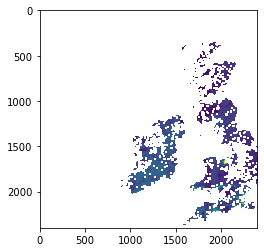

In [62]:
import pylab as plt
image = data1['Lai_500m'].astype(float)
image[image > 248] = np.nan
plt.imshow(image)

In [49]:
from  geog0111.modis import Modis

kwargs = {
    'sds'        : ['Sur_refl4','Sur_refl3','Sur_refl2','Sur_refl1'],
    'product'    : 'MCD19A1',
    'tile'       : 'h17v03',
}

modis = Modis(**kwargs)
data = modis.get_data(2020,150)

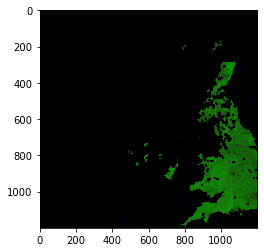

In [64]:
import pylab as plt
r = np.max(data['Sur_refl4'],axis=0).T
g = np.max(data['Sur_refl3'],axis=0).T
b = np.max(data['Sur_refl2'],axis=0).T
image = np.array([r,g,b]).astype(float).T
image[image <= 0] = np.nan
image[image > 16000] = np.nan
plt.imshow(0.0001 * image)

We can similarly use `modis.get_data(year,doy)` to return the interpreted dataset for a given year and day of year (`doy`) in a similar manner to [Exercise 3 in 022 Read write files](022_Read_write_files.ipynb#Exercise-3):

In [ ]:
from  geog0111.modis import Modis

kwargs = {
    'product'    : 'MCD15A3H',
    'tile'       : 'h17v03',
}

modis = Modis(**kwargs)
data = modis.get_data(2019,1+30*4)

# loop over dictionary items
for k,v in data.items():
    # do some neat formatting on k
    print(f'{k:<20s}: {v.shape}')

So any of these datasets, `data[Fpar_500m]`, `data[Lai_500m]` are two dimensional datasets (`(2400, 2400)`) that we might display as images. For example `data[Lai_500m]`.

We follow much the same recipe as for [plotting line graphs](023_Plotting.ipynb), but instead of using `axs.plot()` we use `axs.imshow()`. Further, we can set the subplot title with `axs.set_title(k)` as before. We can usefully include a colour wedge with the plot with `fig.colorbar(im, ax=axs)`.

You should generally use `interpolation=None` when plotting an image dataset as a measurement (e.g. a remote sensing dataset), otherwise it may be interpolated.

In [ ]:
import matplotlib.pyplot as plt

k = 'Lai_500m'
name = f'{kwargs["product"]}'

# plot size 
x_size,y_size = 8,6

fig, axs = plt.subplots(1,1,figsize=(x_size,y_size))
# set the figure title
fig.suptitle(name)

# plot image data
im = axs.imshow(data[k],interpolation=None)
axs.set_title(k)
fig.colorbar(im, ax=axs)

#### Exercise 1

* Plots the 4 datasets `data[Lai_500m]`, `data[LaiStdDev_500m]`, `data[Fpar_500m]`, `data[FparStdDev_500m]` as subplots in a 2 x 2 shape.

Hint: Use a loop for the keys. Set up the 2 x 2 subplots with:

    fig, axs = plt.subplots(2,2,figsize=(x_size,y_size))
    axs = axs.flatten()
    
then you can refer to the subplot axes as `ax[0]`, `ax[1]`, `ax[2]` and `ax[3]` when you loop over the keys. Don't forget to increase `x_size,y_size` appropriately.

In [ ]:
# ANSWER 
from  geog0111.modis import Modis
import matplotlib.pyplot as plt

kwargs = {
    'product'    : 'MCD15A3H',
    'tile'       : 'h17v03',
}

modis = Modis(**kwargs)
data = modis.get_data(2019,1+30*4)

# this is mnost neatly done with a 
# loop over the keys we want
klist = ['Lai_500m','LaiStdDev_500m','Fpar_500m','FparStdDev_500m']

name = f'{kwargs["product"]}'
# plot size 
x_size,y_size = 16,12

fig, axs = plt.subplots(2,2,figsize=(x_size,y_size))
axs = axs.flatten()
# set the figure title
fig.suptitle(name)

# the loop
for i,k in enumerate(klist):
    # plot image data
    im = axs[i].imshow(data[k],interpolation=None)
    axs[i].set_title(k)
    fig.colorbar(im, ax=axs[i])

## Colour images

The datasets we displayed above are a single channel of spatial information. But sometimes we want to display colour from three bands of data.

## Colourmaps

As you would expect, you can customise your plots. We illustrate this by changing the colourmap used here in a pseudocolour display of the data. For some others, [please see the matplotlib tutorial](https://matplotlib.org/tutorials/introductory/images.html).

There are various ways to set the colour map, but when working with sub-images, trhe easiest is of the form:

    im = ax.imshow(data)
    im.set_cmap(c)

where `c` here is some colourmap.

For further discussions on colourmaps and options see the [relevant tutorial]( 
https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html) and the [colour map reference](
https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html).

In [ ]:
import matplotlib.pyplot as plt

k = 'Lai_500m'
name = f'{kwargs["product"]}'

# plot size 
x_size,y_size = 16,12

fig, axs = plt.subplots(2,2,figsize=(x_size,y_size))
axs = axs.flatten()

# set the figure title
fig.suptitle(name)

cmaps = ['Greys','gray','rainbow','seismic']

for i,c in enumerate(cmaps):
    # plot image data
    im = axs[i].imshow(data[k],interpolation=None)
    im.set_cmap(c)
    axs[i].set_title(c)
    fig.colorbar(im, ax=axs[i])

## Summary

In this section, we have learned how to plot graphs from datasets we have read in or downloaded from the web. We have concentrated in simple line graphs, with possibly multiple sub-plots here, although there are many other types of graph you may consider. 

The [`matplotlib` gallery](https://matplotlib.org/3.3.1/gallery/index.html) provides a useful starting point for other types of plot. You might also consider the Python packages [`bokeh`](https://bokeh.org/) and [`seaborn`](https://seaborn.pydata.org/) for improved visualisation and interaction.

In [ ]:
# ANSWER 3
# Plot the pulsar samples in a series of 80 sub-plots.
import matplotlib.pyplot as plt

# need to play with this to get it right
x_size,y_size = 15,20

# get the m onth names from columns
samples = df.columns
fig,axs = plt.subplots(len(df.columns),1,figsize=(x_size,y_size))

# use enumerate in the loop, to get the index
for i,m in enumerate(samples):
    axs[i].plot(df[m],'k')
    axs[i].axis('off')


[<img src="images/noun_post_2109127.svg" width="50" align='right'>](016_Python_for.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](014_Python_groups.ipynb)
